# **Background and Context:**



- Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

- That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


- Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

# Objective:

- To implement the techniques learned as a part of the course.

# **Data Description:**

- A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Dataset:**


The dataset has the following columns:

    - tweet_id                                                           
    - airline_sentiment                                               
    - airline_sentiment_confidence                               
    - negativereason                                                   
    - negativereason_confidence                                    
    - airline                                                                 
    - airline_sentiment_gold                                              
    - name     
    - negativereason_gold 
    - retweet_count
    - text
    - tweet_coord
    - tweet_created
    - tweet_location 
    - user_timezone



### Let's start by importing necessary libraries

In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from collections import Counter                                           # count the key-value pairs in an object

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 125 kB 31.5 MB/s 
     |████████████████████████████████| 287 kB 40.9 MB/s 
     |████████████████████████████████| 106 kB 59.2 MB/s 


In [2]:
#Let's mount at google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/nlp


Mounted at /gdrive
/gdrive/MyDrive/nlp


### Load and overview the dataset

In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [4]:
#Let's see the head of the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Exploratory Data Analysis (EDA)

In [6]:
data.shape               # print shape of data.

(14640, 15)

- There are 14640 rows and 15 columns/features in the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t


- Most of the data is of object type.
- There are some missing values in several columns.

### Missing Value analysis

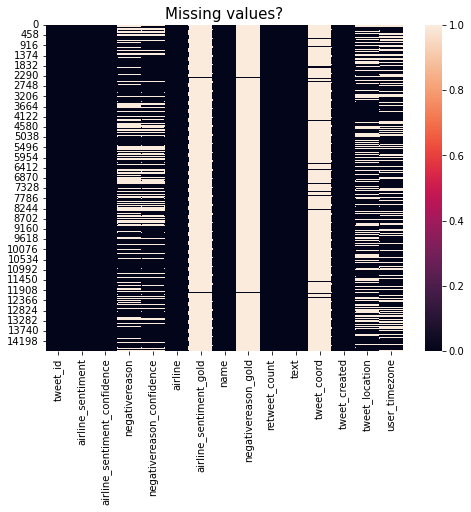

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- Based of the above graph, there are null values in  `negativereason`,`negativereason_confidence`,`airline_sentiment_gold`,`negativereason_gold`,`tweet_coord`,`tweet_location`,`user_timezone`.


In [9]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

 * This information clearly shows the missing values in the columns mentioned above.

### The below function, will give these output in Dataframe

- Zero Values
- Missing Values
- % of Total Values
- Total Zero Missing Values
- % Total Zero Missing Values
- Data Type

In [10]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
tweet_location,0,4733,32.3,4733,32.3,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


* negativereason_gold column has got 99.8% missing value
* airline_sentiment_goldcolumn has got 99.7% missing values
* tweet_coord column has got 93% missing value
* negativereason column has got 37.3% missing value
* user_timezone column has got 32.9% missing values
* tweet_location column has got 32.3% missing value
* negativereason_confidence column has got 37.3% missing value

In [11]:
#Drop the column which have got too many missing values or does not relevent information
data.drop(['tweet_id', 'negativereason','negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'],axis=1,inplace=True)
data.shape

(14640, 7)

In [13]:
year=[]
month=[]
date=[]
hour=[]
for x in data['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

data['year']=year
data['month']=month
data['dates']=date
data['hour']=hour
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,year,month,dates,hour
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,2015,2,24,11
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,2015,2,24,11
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,2015,2,24,11
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,2015,2,24,11
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,2015,2,24,11


- Let's describe the data

In [15]:
data.describe()  

,airline_sentiment_confidence,retweet_count,year,month,dates,hour
count,14640.000000,14640.000000,14640.0,14640.0,14640.000000,14640.000000
mean,0.900169,0.082650,2015.0,2.0,20.947473,12.319945
std,0.162830,0.745778,0.0,0.0,2.170646,5.306285
min,0.335000,0.000000,2015.0,2.0,16.000000,0.000000
25%,0.692300,0.000000,2015.0,2.0,19.000000,8.000000
50%,1.000000,0.000000,2015.0,2.0,22.000000,12.000000
75%,1.000000,0.000000,2015.0,2.0,23.000000,17.000000
max,1.000000,44.000000,2015.0,2.0,24.000000,23.000000


- `airline_sentiment_confidence` value ranges from 0.35 to 1.00.
- `Year` is fixed 2015, So, all the data is of the year 2015.

Text(0.5, 0.98, 'Characters in message')

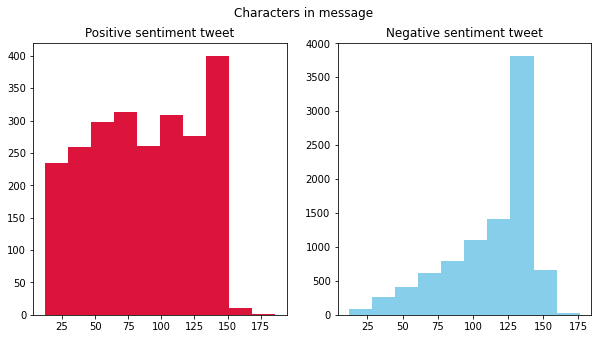

In [16]:
#Number of characters in tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Characters in message')

- The `Negative sentiment tweet ` characters in message is showing more prominance than the `Positive sentiment tweet`.

Text(0.5, 0.98, 'Words in a tweet')

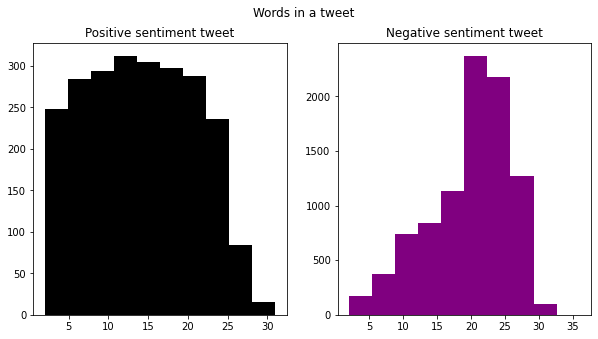

In [17]:
#Number of words in a tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

- The `Negative sentiment tweet ` words in message is showing more prominance than the `Positive sentiment tweet`.

#### Most active hour on twitter

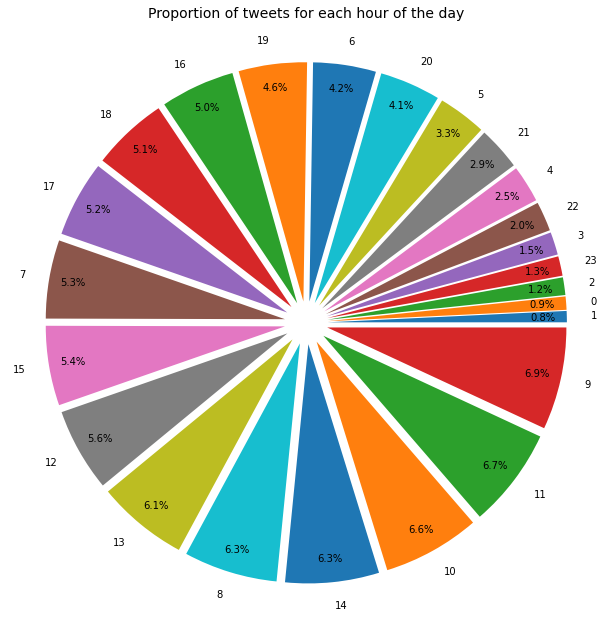

In [18]:
#Using matplotlib
Category=data['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

- **Most tweets occur between 08:00 to 15:00 hour of the day at the most.**
- **Tweets are less at the night hour of the whole day.**

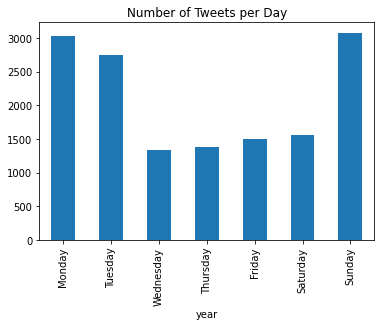

In [19]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']) # To make sure that pandas understands it's a date
plt.figsize = (16,10)

plt.title("Number of Tweets per Day")
tweet_cpt = data["tweet_created"].groupby(data["tweet_created"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")    #Assigning each day of the week as index
plt.xlabel("year")
plt.show()

- The highest number of tweets happen at weekend. In Monday and tuesday, it decreases gradually. 

In [20]:
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,year,month,dates,hour
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,2015,2,24,11
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,2015,2,24,11
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,2015,2,24,11
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,2015,2,24,11
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,2015,2,24,11


- Let's Drop all other columns except “text” and “airline_sentiment”.

In [21]:
#Drop the column which have got too many missing values or does not relevent information
data.drop(['airline_sentiment_confidence', 'airline','name','retweet_count','tweet_created','year','month','dates','hour'],axis=1,inplace=True)
data.shape

(14640, 2)

### Text Preprocessing - removal of http links 

In [22]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [23]:
!pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

#### Pre processing: De-contraction of words

In [24]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in data.iterrows():
    content = data.at[i, 'text']
    clean_content = replace_contractions(content)
    data.at[i,'text'] = clean_content
data.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [25]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre Processing : Removal of number

In [26]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


### Pre Processing - Tokenization

In [27]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


#### Remove non-ascii character

In [28]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [29]:
data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


### Preprocessing-Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [30]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [31]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[@, virginamerica, what, @, dhepburn, said, .]"
1,positive,"[@, virginamerica, plus, you, have, added, com..."
2,neutral,"[@, virginamerica, i, did, not, today, ..., mu..."
3,negative,"[@, virginamerica, it, is, really, aggressive,..."
4,negative,"[@, virginamerica, and, it, is, a, really, big..."


### Preprocessing: Removal of Punctuation

In [32]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [33]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


### Pre-Processing - Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [34]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stopwords = stopwords.words('english')

In [36]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [37]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, today, must, mean, need, take,..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [39]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [40]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercial, exper..."
2,neutral,"[virginamerica, today, must, mean, need, take,..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


- Text preprocessing-Normalization(aggregating pre-processing function into one)

In [41]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text']  = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


- The most Common words in content column

In [42]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in data['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,4568
1,united,4160
2,usairways,3051
3,americanair,2961
4,southwestair,2461
5,jetblue,2395
6,get,1376
7,hour,1161
8,thanks,1079
9,cancelled,1056


#### Most common words in the positive and negative Sentiments tweets

In [43]:
Positive_sent = data[data['airline_sentiment']=='positive']
Negative_sent = data[data['airline_sentiment']=='negative']


In [44]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


#### Finding common words for positive sentiment tweets

In [45]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['text'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,thanks,609
1,jetblue,595
2,southwestair,576
3,united,528
4,thank,453
5,flight,436
6,americanair,355
7,usairways,276
8,great,236
9,service,163


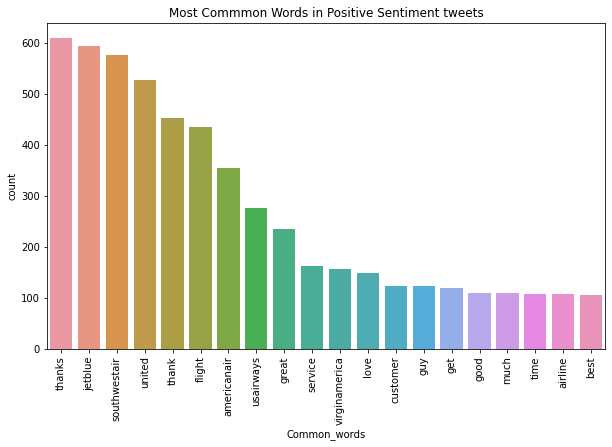

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

### Finding common words for negative sentiment tweets

In [47]:
#MosT common positive words
top = Counter([item for sublist in Negative_sent['text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='flare')

,Common_words,count
0,flight,3357
1,united,2895
2,usairways,2374
3,americanair,2107
4,southwestair,1214
5,hour,1107
6,jetblue,1052
7,get,1015
8,cancelled,920
9,customer,776


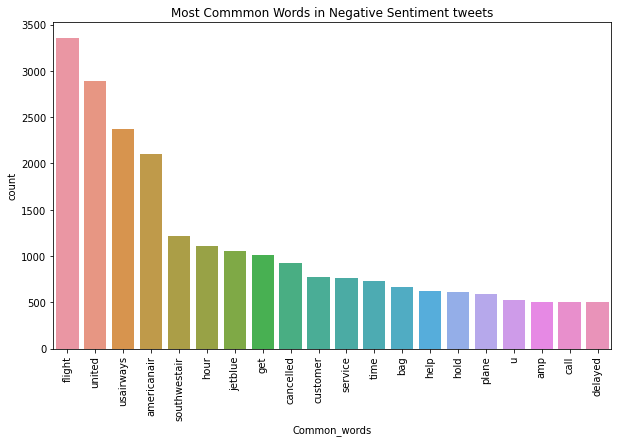

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

In [49]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

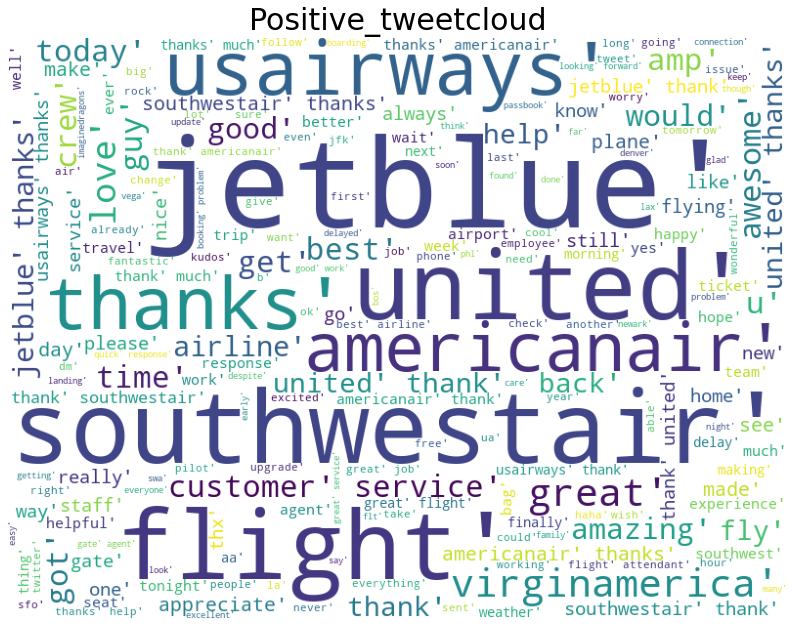

In [50]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")


- Word like "thanks", "jetblue", "southwestair","great", "customer","service", "good", "amazing", "help","love" highlighted in the positive sentiment tweet.

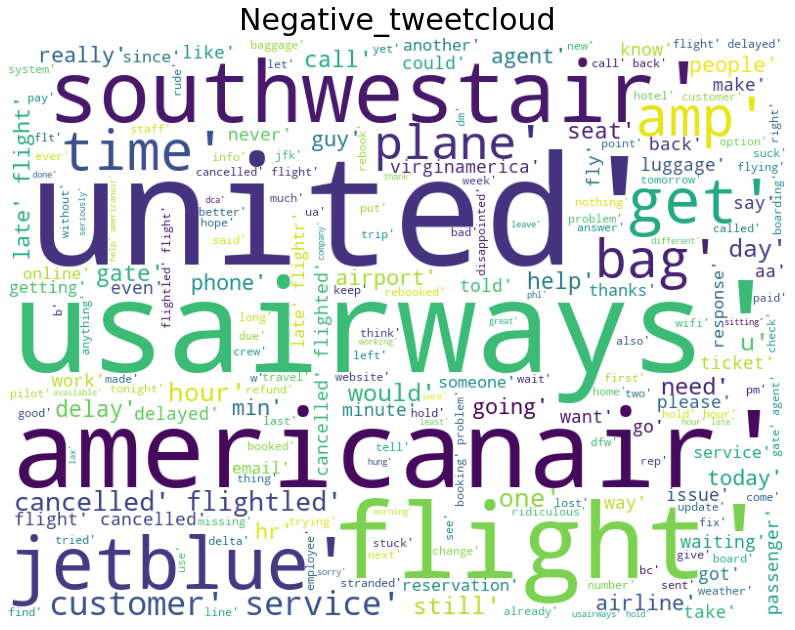

In [51]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")

- Word like "Flight", "time", "plane","bag", "amp","late", "cancelled", "still", "get" highlighted in the negative sentiment tweet.

### Building the model based on CountVectorizer and TF-IDF :

In [52]:
# Converting text column into list

data['text']  = data.apply(lambda row: "".join(row['text']), axis=1)

In [53]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=2000)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [54]:
data_features.shape       #Shape of the feature vector

(14640, 2000)

In [55]:
X = data_features

y = data.airline_sentiment

In [56]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [57]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [58]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

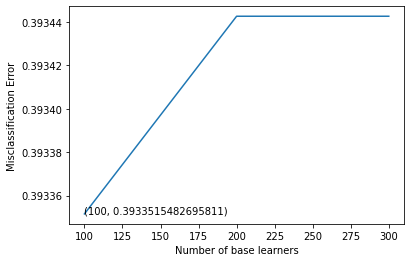

In [59]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [60]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2627
           1       0.50      0.00      0.00       577
           2       0.92      0.02      0.05       456

    accuracy                           0.72      3660
   macro avg       0.71      0.34      0.30      3660
weighted avg       0.71      0.72      0.61      3660

Accuracy of the model is :  0.7210382513661202


[[2627    0    0]
 [ 575    1    1]
 [ 444    1   11]]


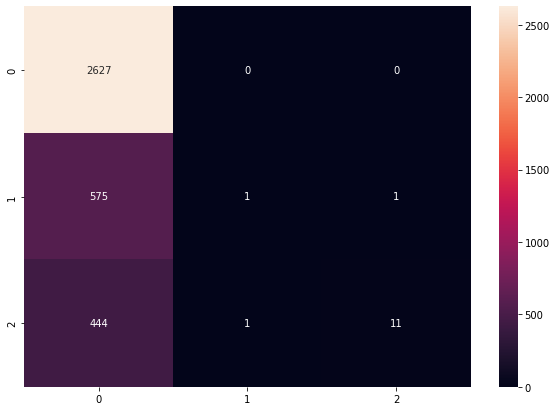

In [61]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


jetbluedm,unitedneedworkunitedflierfriendlyprogramleastclueflightattendant,jetbluethankmuch,jetbluesent,southwestairterryherogothusbandbackthrusecurityretrievecellphoneleftplaneaustinterryrock,unitednegativedonewastingtimeamateurcustomerservicethanksleastoffering,jetblueceobattleappeasepassengerwallstreetthevdt,unitedneverheard,okayrtjetbluefleetfleek,southwestairthank,unitedneverheldplanehourdelaymultipledooropeningandclosingdangerofgettingsnowedin,southwestairlongerchangetripcompaniononlineyeargetmessagedoneonline,unitednewestdelayright,southwestairthanks,unitednever,southwestairceokellydrawrecordcrowdbwi_airportbusinesspartnershipbreakfast,southwestairdmfollow,uniteddaughterbookedgoldmembermilegetupgradelistflighttomorrow,unitednevermisleadcompanymanytimeweekunitedairline,jetblueguyrock,jetbluertwmcactionnewsnewairlineexpectedmakewaymem,jetbluenewceoseekrightbalancepleasepassengerwalldailyjournal,unitednewapplecrapeamazingliveuareallynicecrewamericanairbiscuituaneed,southwestairsent

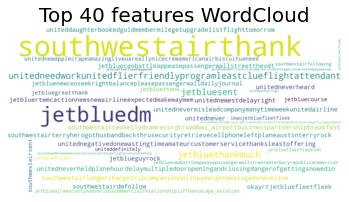

In [97]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### TF-IDF
- Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [63]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [64]:
X = data_features

y = data.airline_sentiment

In [65]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [66]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [67]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

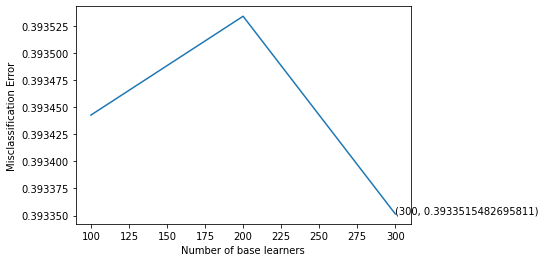

In [68]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [69]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2627
           1       0.50      0.00      0.00       577
           2       0.92      0.02      0.05       456

    accuracy                           0.72      3660
   macro avg       0.71      0.34      0.30      3660
weighted avg       0.71      0.72      0.61      3660

Accuracy of the model is :  0.7210382513661202


[[2627    0    0]
 [ 575    1    1]
 [ 444    1   11]]


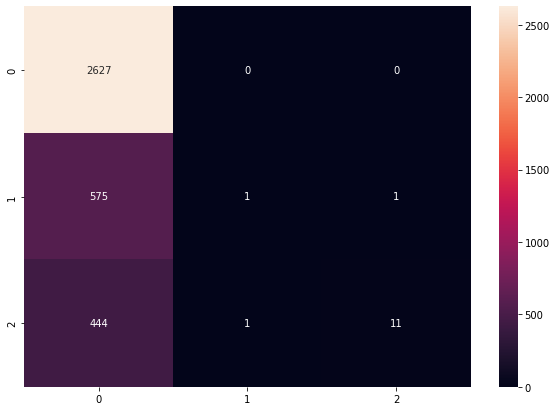

In [70]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


jetbluefleetfleek, unitedthank, jetbluethanks, jetbluethank, southwestairthank, unitedthanks, jetblueceobattleappeasepassengerwallstreetwaterburyrepublicanamerican, usairwaysthank, rtjetbluefleetfleek, southwestairthanks, usairwaysthanks, southwestairsent, virginamericathanks, southwestairyesplease, unitedthnx, southwestairdm, southwestairdone, unitedflight, virginamericaatlanticploughlonefurrowmiddleeastthenationaluae, jetbluenewceoseekrightbalancepleasepassengerwalldailyjournal, jetbluesent, jetbluertwmcactionnewsnewairlineexpectedmakewaymem, virginamericagetawaydealmayonewaylotcoolcitycheapflightsfarecompare, southwestairsign, jetblueguyrock, jetbluethankmuch, jetbluedefinitely, jetblueceobattleappeasepassengerwallstreet, unitedplsfollowdm, jetbluegreatthank, okayrtjetbluefleetfleek, jetblueceopilotamongardentfanwallstreetpoughkeepsiejournal, jetblueflight, southwestairgetcompanionpa, unitedsent, virginamericathank, southwestairterryherogothusbandbackthrusecurityretrievecellphonelef

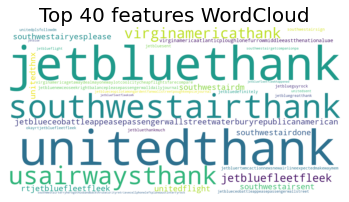

In [71]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF

In [72]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,positive,negative,negative


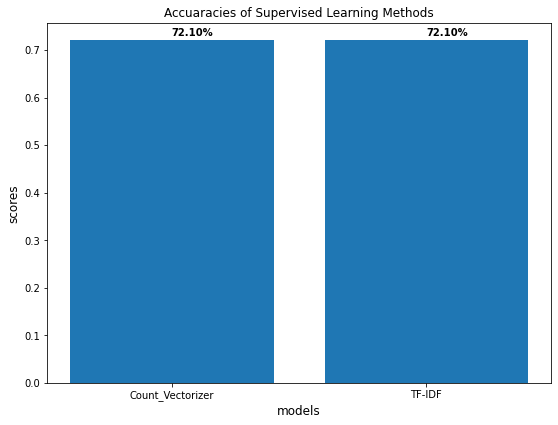

In [73]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

TF-IDF shows an equivalent performance as Count Vectorizer, though it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions

# Unsupervised Learning methods for Sentiment Analysis

* VADER
- VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us how positive or negative a sentiment is.

In [74]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [75]:
data_new = data.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [76]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

,airline_sentiment,text,scores
0,neutral,virginamericadhepburnsaid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,positive,virginamericaplusaddedcommercialexperiencetacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,neutral,virginamericatodaymustmeanneedtakeanothertrip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,negative,virginamericareallyaggressiveblastobnoxiousent...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,negative,virginamericareallybigbadthing,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [77]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,airline_sentiment,text,scores,compound
0,neutral,virginamericadhepburnsaid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,positive,virginamericaplusaddedcommercialexperiencetacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,neutral,virginamericatodaymustmeanneedtakeanothertrip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,negative,virginamericareallyaggressiveblastobnoxiousent...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,negative,virginamericareallybigbadthing,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [78]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,scores,compound,comp_score
0,neutral,virginamericadhepburnsaid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1
1,positive,virginamericaplusaddedcommercialexperiencetacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1
2,neutral,virginamericatodaymustmeanneedtakeanothertrip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1
3,negative,virginamericareallyaggressiveblastobnoxiousent...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1
4,negative,virginamericareallybigbadthing,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1


In [79]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred
0,neutral,virginamericadhepburnsaid,1
1,positive,virginamericaplusaddedcommercialexperiencetacky,1
2,neutral,virginamericatodaymustmeanneedtakeanothertrip,1
3,negative,virginamericareallyaggressiveblastobnoxiousent...,1
4,negative,virginamericareallybigbadthing,1


In [80]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["airline_sentiment"] = ord_enc.fit_transform(data[["airline_sentiment"]])
data[["airline_sentiment"]].head(11)


,airline_sentiment
0,1.0
1,2.0
2,1.0
3,0.0
4,0.0
5,0.0
6,2.0
7,1.0
8,2.0
9,2.0


In [81]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()))

Accuaracy using Vader Sentiment Analysis is :  0.21168032786885246


[[   0 9178    0]
 [   0 3099    0]
 [   0 2363    0]]


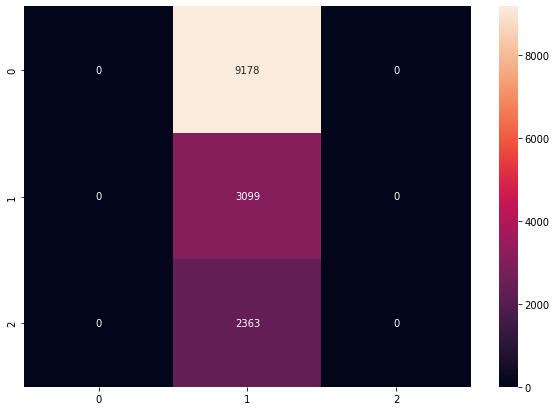

In [82]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- With the help of the TextBlob.sentiment() method, we can get the sentiments of the sentences by using TextBlob.sentiment() method.

### TextBlob

In [83]:
from textblob import TextBlob

In [84]:
data_new = data.copy()      #make a copy of dataframe and do unsupervised operations on that

In [85]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

,airline_sentiment,text,VADER_pred,polarity
0,1,virginamericadhepburnsaid,1,0.0
1,2,virginamericaplusaddedcommercialexperiencetacky,1,0.0
2,1,virginamericatodaymustmeanneedtakeanothertrip,1,0.0
3,0,virginamericareallyaggressiveblastobnoxiousent...,1,0.0
4,0,virginamericareallybigbadthing,1,0.0


In [86]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,VADER_pred,polarity,polarity_score
0,1,virginamericadhepburnsaid,1,0.0,1
1,2,virginamericaplusaddedcommercialexperiencetacky,1,0.0,1
2,1,virginamericatodaymustmeanneedtakeanothertrip,1,0.0,1
3,0,virginamericareallyaggressiveblastobnoxiousent...,1,0.0,1
4,0,virginamericareallybigbadthing,1,0.0,1


In [87]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,1,virginamericadhepburnsaid,1,1
1,2,virginamericaplusaddedcommercialexperiencetacky,1,1
2,1,virginamericatodaymustmeanneedtakeanothertrip,1,1
3,0,virginamericareallyaggressiveblastobnoxiousent...,1,1
4,0,virginamericareallybigbadthing,1,1


In [88]:
data['airline_sentiment'].unique()         #check the labels

array([1, 2, 0])

In [89]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)  #convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob Sentiment Analysis is :  0.21168032786885246


[[   0 9178    0]
 [   0 3099    0]
 [   0 2363    0]]


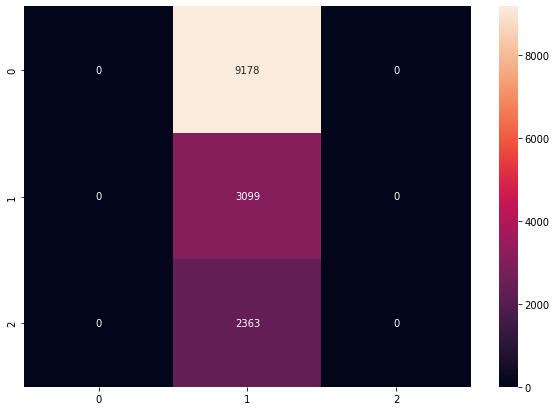

In [90]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob¶

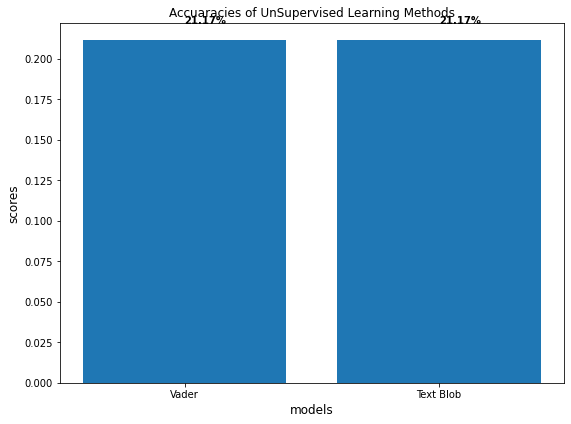

In [91]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

- Here, Text Blob works as similar to Vader though VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage

* Summary:

- We imported tha data, observed the shape and data type of each column.

- We used a dataset which has airline setiment expressed in `neutral`,`positive` and `negative` .

- We analysed the missing value by plotting the graphs and created a datrame of the column which has got missing value based on different parameter.
We extracted year, month, date, hour from the raw date information.

- We created a pie chart using plotly where we plotted the proportion of tweet for each hour of the day and found that he tweets between 08:00 to 15:00 hour of the day at the most & tweets are minimum at the night hour of the day.

- The most number of tweets happened at the weekend which is quite understandable.


- We applied all necessary pre processing steps to remove and alter the anamoly from the text. It helps us to explore the data more precisely.

- We plotted the most common words and their frequency from the tweet.

- We plotted the most common words and their frequency from the positive sentiment tweet and negative sentiment tweet.

- We plotted the wordcloud graph of the positive and negative sentiment tweet.

- We used count vectorizer and TF-IDF vectorizer. We analysed and tuned both model and successfully plotted the top 40 features using both the vectorizer.

- We campared the performance of both the vectorizer and found them as same for both the cases.

- To ensure this, we further used VADER and TextBlob methods. We compared the performance of both the models in these cases as well. We found it to be the same as well. 
